<a href="https://colab.research.google.com/github/ce20480/PythonPractice/blob/main/IntroToImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this is to make sure the initial random point is the same
from numpy.random import seed
from tensorflow.random import set_seed
seed(0)
set_seed(0)

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
print('x_train shape: ', x_train.shape)# num of train data points
print('x_test shape: ', x_test.shape)# num of test data points
import numpy as np

num_classes = len(np.unique(y_train))
print('num classes: ', num_classes)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
num classes:  10


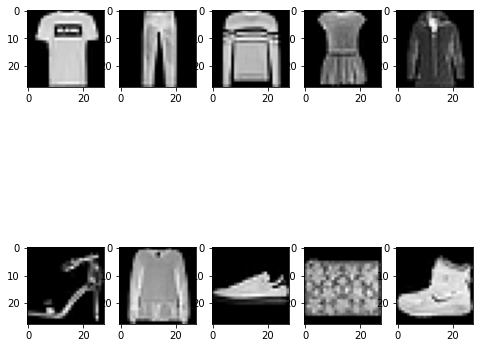

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
  fig.add_subplot(2,5, i+1)
  idx = np.where(y_train==i)[0]
  im = x_train[idx][0]

  plt.imshow(im, plt.get_cmap('gray'))

In [9]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]) # flatten into vector
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print('x_train shape:', x_train.shape)
print('x_train_flat shape: ', x_train_flat.shape)

x_train shape: (60000, 28, 28)
x_train_flat shape:  (60000, 784)


In [11]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print('example of y class: ', y_train[3])
print('example of one hot encoding y class: ', y_train_categorical[3])

example of y class:  3
example of one hot encoding y class:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential()
num_features = x_train_flat.shape[1]
num_classes = y_train_categorical.shape[1]
model.add(Dense(128, input_dim=num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(x_train_flat, y_train_categorical, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2748 - accuracy: 0.2572
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9072 - accuracy: 0.2808
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8739 - accuracy: 0.2908
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8489 - accuracy: 0.2992
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8263 - accuracy: 0.3071
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8045 - accuracy: 0.3141
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7662 - accuracy: 0.3246
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7059 - accuracy: 0.3689
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5650 - accuracy: 0.4569
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.439

In [21]:
loss, accuracy = model.evaluate(x_test_flat, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.4267 - accuracy: 0.5126


Text(0, 0.5, 'loss')

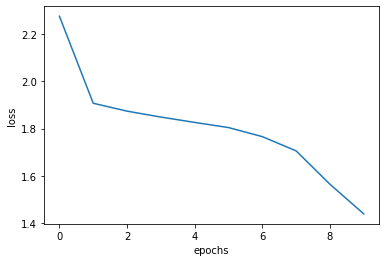

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

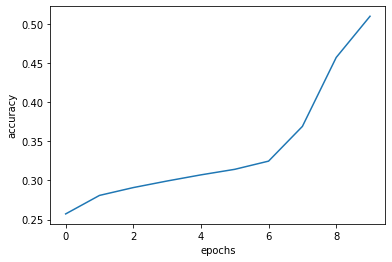

In [23]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [30]:
from tensorflow.keras.layers import Conv2D # 1D useful for audio data 3D for video
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [27]:
channels = 1 # since black white only 1 but if RGB there would be 3
height = x_train.shape[1]
width = x_train.shape[2]
print(x_train.shape)
x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)
print(x_train_cnn.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels)))# filters processes raw data more filters more features we can extract
# kernel size is the size of the filter, padding makes sure the kernels are always same size(fills in extra values)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # each time in this pool size 2x2 window we take max value and reduce spacial size and move every other 2x2 stride

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels))) # these layers identify deeper features 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # final layer outputting probabilities

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train_categorical, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.7745 - accuracy: 0.7529
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4942 - accuracy: 0.8284
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4409 - accuracy: 0.8446
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4087 - accuracy: 0.8544
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3876 - accuracy: 0.8621
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3698 - accuracy: 0.8695
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3563 - accuracy: 0.8738
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3448 - accuracy: 0.8773
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3353 - accuracy: 0.8809
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.32

In [33]:
loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)# you can see that CNN is way better than the FC neural network from before showing why cnn are used for image classification

313/313 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8683


Text(0, 0.5, 'loss')

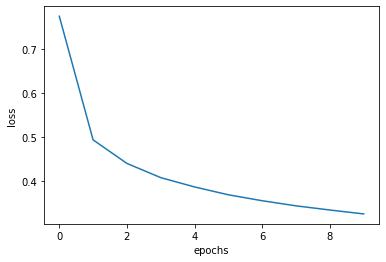

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

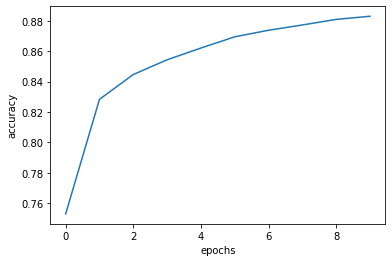

In [35]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')